In [139]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/genderinequalityindex/GII_HDR2020_040722.csv


# Datasetini inceleme ve temzileme işlemleri. 

In [140]:
df = pd.read_csv("/kaggle/input/genderinequalityindex/GII_HDR2020_040722.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,iso3,country,hdicode,region,gii_rank_2019,gii_1995,gii_2000,gii_2005,gii_2010,gii_2011,...,lfpr_m_2010,lfpr_m_2011,lfpr_m_2012,lfpr_m_2013,lfpr_m_2014,lfpr_m_2015,lfpr_m_2016,lfpr_m_2017,lfpr_m_2018,lfpr_m_2019
0,AFG,Afghanistan,Low,SA,157.0,NaN,NaN,0.745,0.751,0.743,...,78.401,78.302,78.208,77.535,76.865,76.198,75.483,74.735,74.707,74.658
1,AGO,Angola,Medium,SSA,132.0,NaN,NaN,NaN,NaN,NaN,...,78.871,79.029,79.077,79.120,79.116,79.105,79.131,79.071,78.981,78.913
2,ALB,Albania,High,ECA,42.0,NaN,0.334,0.306,0.242,0.249,...,62.894,63.577,64.345,61.243,62.485,63.830,64.382,64.839,64.724,64.568
3,AND,Andorra,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,18.0,0.635,0.609,0.592,0.233,0.236,...,94.673,94.479,94.314,94.255,94.373,94.646,93.969,93.457,93.343,93.389


*"iso3" ve "gii_rank_2019" sütununda bulunan veriler ve erkekler için bir inceleme durumu gerekli olmadığı için(male) kalıcı bir şekilde o sütunları silme işlemini gerçekleştiriyoruz.* Veri setinde yer alan sütunların kısaltmaları ve açıklamaları şu şekildedir. 
- **Gender Inequality Index (GII)**: **Toplumsal Cinsiyet Eşitsizliği Endeksi**  
  - Kadınlar ve erkekler arasındaki eşitsizliği üç boyutta ölçen bileşik bir endekstir: **Üreme sağlığı, güçlendirme ve iş gücü piyasası**.  

- **Maternal Mortality Ratio (MMR)**: **Anne Ölüm Oranı**  
  - **100.000 canlı doğum başına hamilelik ile ilgili nedenlerden dolayı meydana gelen ölüm sayısıdır.**  

- **Adolescent Birth Rate (ABR)**: **Ergen Doğum Oranı**  
  - **15-19 yaş arası kadınlar başına düşen doğum sayısını (1.000 kadın başına) ifade eder.**  

- **Share of Seats in Parliament (PR)**: **Parlamentodaki Kadın Temsili**  
  - **Ulusal parlamentodaki kadınların oranını (toplam sandalyeye kıyasla) yüzde olarak gösterir.**  
  - **İki meclisli (bicameral) sistemlerde her iki meclisin toplamına göre hesaplanır.**  

- **Population with at least some Secondary Education (SE)**: **En Az Ortaöğretim Görmüş Nüfus Oranı**  
  - **25 yaş ve üzeri nüfus içinde en az ortaöğretim seviyesine ulaşmış kişilerin yüzdesidir.**  

- **Labour Force Participation Rate (LFPR)**: **İşgücüne Katılım Oranı**  
  - **15 yaş ve üzeri nüfus içinde çalışmakta olan veya aktif olarak iş arayan kişilerin oranıdır.**  


In [141]:
df.drop(columns=[col for col in df.columns if '_m_' in col] + ['iso3','gii_rank_2019',], inplace=True)


*Veri setinde boş olan sütunların sayılarını inceliyoruz.*

In [142]:
df.isnull().sum()

country         0
hdicode        17
region         55
gii_1995       78
gii_2000       80
               ..
lfpr_f_2015    15
lfpr_f_2016    15
lfpr_f_2017    15
lfpr_f_2018    15
lfpr_f_2019    15
Length: 80, dtype: int64

In [143]:
list(df.columns)

['country',
 'hdicode',
 'region',
 'gii_1995',
 'gii_2000',
 'gii_2005',
 'gii_2010',
 'gii_2011',
 'gii_2012',
 'gii_2013',
 'gii_2014',
 'gii_2015',
 'gii_2016',
 'gii_2017',
 'gii_2018',
 'gii_2019',
 'mmr_1995',
 'mmr_2000',
 'mmr_2005',
 'mmr_2010',
 'mmr_2011',
 'mmr_2012',
 'mmr_2013',
 'mmr_2014',
 'mmr_2015',
 'mmr_2016',
 'mmr_2017',
 'abr_1995',
 'abr_2000',
 'abr_2005',
 'abr_2010',
 'abr_2011',
 'abr_2012',
 'abr_2013',
 'abr_2014',
 'abr_2015',
 'abr_2016',
 'abr_2017',
 'abr_2018',
 'abr_2019',
 'se_f_1995',
 'se_f_2000',
 'se_f_2005',
 'se_f_2010',
 'se_f_2011',
 'se_f_2012',
 'se_f_2013',
 'se_f_2014',
 'se_f_2015',
 'se_f_2016',
 'se_f_2017',
 'se_f_2018',
 'se_f_2019',
 'pr_f_1995',
 'pr_f_1997',
 'pr_f_2000',
 'pr_f_2005',
 'pr_f_2010',
 'pr_f_2011',
 'pr_f_2012',
 'pr_f_2013',
 'pr_f_2014',
 'pr_f_2015',
 'pr_f_2016',
 'pr_f_2017',
 'pr_f_2018',
 'pr_f_2019',
 'lfpr_f_1995',
 'lfpr_f_2000',
 'lfpr_f_2005',
 'lfpr_f_2010',
 'lfpr_f_2011',
 'lfpr_f_2012',
 'lfpr_f_2

In [144]:
df["country"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Côte d'Ivoire", 'Cameroon',
       'Congo (Democratic Republic of the)', 'Congo', 'Colombia',
       'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia (Federated States of)', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Guinea'

# Eksik verilerin analizi

In [145]:
#pip install missingno

In [146]:
import missingno as msn
import matplotlib.pyplot as plt


*Missingno kütüphanesini kullanarak eksik verilerin analizini gerçekleştiriyoruz.*

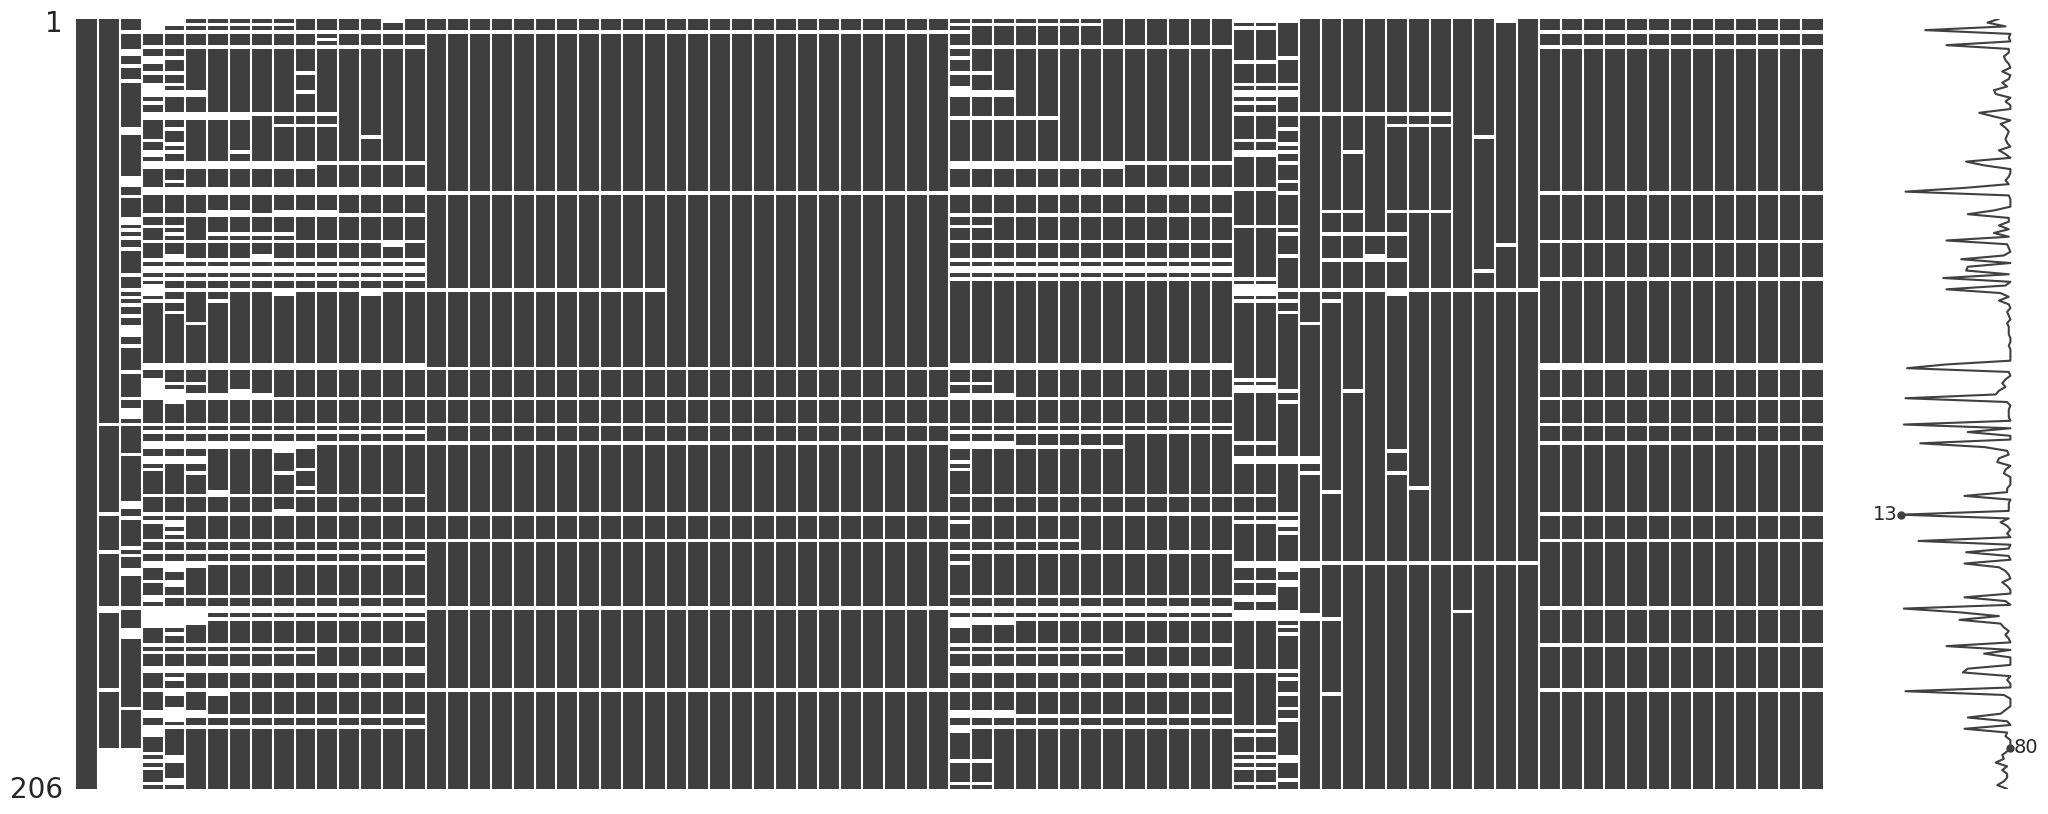

In [147]:
msn.matrix(df);

In [148]:
rows_with_missing_data = df[df.isnull().any(axis=1)]

rows_with_missing_data

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,country,hdicode,region,gii_1995,gii_2000,gii_2005,gii_2010,gii_2011,gii_2012,gii_2013,...,lfpr_f_2010,lfpr_f_2011,lfpr_f_2012,lfpr_f_2013,lfpr_f_2014,lfpr_f_2015,lfpr_f_2016,lfpr_f_2017,lfpr_f_2018,lfpr_f_2019
0,Afghanistan,Low,SA,NaN,NaN,0.745,0.751,0.743,0.734,0.724,...,14.935000,15.339000,15.850000,16.765000,17.735000,18.760000,19.840000,20.973000,21.416000,21.595000
1,Angola,Medium,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.767000,75.851000,75.910000,75.971000,76.019000,76.065000,76.108000,76.130000,76.142000,76.136000
2,Albania,High,ECA,NaN,0.334,0.306,0.242,0.249,0.230,0.221,...,45.761000,46.515000,47.371000,43.311000,43.297000,46.102000,46.451000,46.795000,46.799000,46.712000
3,Andorra,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Argentina,Very High,LAC,0.427,0.417,0.372,0.358,0.354,0.351,0.348,...,47.952000,48.228000,48.324000,47.942000,47.318000,48.016000,48.699000,49.370000,50.822000,50.721000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Europe and Central Asia,NaN,NaN,0.477,0.425,0.364,0.311,0.304,0.296,0.289,...,43.562368,43.992191,43.979103,44.495956,44.306855,44.815226,44.942094,45.105376,45.211876,45.014153
202,Latin America and the Caribbean,NaN,NaN,0.511,0.483,0.451,0.430,0.427,0.420,0.415,...,50.848879,50.520177,51.362130,51.227989,50.940112,51.205769,51.361981,51.710345,52.080720,52.083588
203,South Asia,NaN,NaN,0.704,NaN,0.610,0.567,0.563,0.559,0.565,...,26.018298,25.037157,24.086814,23.888113,23.674123,23.662883,23.501470,23.536772,23.271650,23.182796
204,Sub-Saharan Africa,NaN,NaN,NaN,NaN,0.619,0.600,0.593,0.592,0.584,...,64.674403,64.571575,63.940908,63.477560,63.255106,63.239826,63.203366,63.327897,63.378186,63.340002


*Tahmin ve analiz işlemlerini sağlıklı yapabilmek adına veri setinde yıllar bazında verilmiş metriklerin eksik yılları var mı analizini gerçekleştiriyoruz.*

In [149]:
years_in_columns = [
    col.split('_')[1] for col in df.columns if '_' in col and col.split('_')[1].isdigit()
]

valid_years_in_columns = {
    year: sum(1 for col in df.columns if f"_{year}" in col) 
    for year in range(1995, 2020)
}

# Sonuçları yazdıralım
valid_years_in_columns


{1995: 6,
 1996: 0,
 1997: 1,
 1998: 0,
 1999: 0,
 2000: 6,
 2001: 0,
 2002: 0,
 2003: 0,
 2004: 0,
 2005: 6,
 2006: 0,
 2007: 0,
 2008: 0,
 2009: 0,
 2010: 6,
 2011: 6,
 2012: 6,
 2013: 6,
 2014: 6,
 2015: 6,
 2016: 6,
 2017: 6,
 2018: 5,
 2019: 5}

*1995 ile 2019 yılları arasında her bir metrik için olan yılları, temizleyeceğimiz veri setimize katmak için hazırlıyoruz.*

In [150]:
years_with_six_columns = [year for year, count in valid_years_in_columns.items() if count == 6]

# Sonuçları yazdıralım
years_with_six_columns

[1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [151]:
years = ['1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

# İlgili metrikler
metrics = ['gii', 'mmr', 'abr', 'se_f', 'pr_f', 'lfpr_f']

# İlgili sütunları seçme
selected_columns = ['country', 'region', 'hdicode'] + [f'{metric}_{year}' for metric in metrics for year in years]
df_selected = df[selected_columns]

df_selected

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,country,region,hdicode,gii_1995,gii_2000,gii_2005,gii_2010,gii_2011,gii_2012,gii_2013,...,lfpr_f_2000,lfpr_f_2005,lfpr_f_2010,lfpr_f_2011,lfpr_f_2012,lfpr_f_2013,lfpr_f_2014,lfpr_f_2015,lfpr_f_2016,lfpr_f_2017
0,Afghanistan,SA,Low,NaN,NaN,0.745,0.751,0.743,0.734,0.724,...,14.634000,15.801000,14.935000,15.339000,15.850000,16.765000,17.735000,18.760000,19.840000,20.973000
1,Angola,SSA,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.624000,75.493000,75.767000,75.851000,75.910000,75.971000,76.019000,76.065000,76.108000,76.130000
2,Albania,ECA,High,NaN,0.334,0.306,0.242,0.249,0.230,0.221,...,51.479000,47.943000,45.761000,46.515000,47.371000,43.311000,43.297000,46.102000,46.451000,46.795000
3,Andorra,NaN,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,AS,Very High,0.635,0.609,0.592,0.233,0.236,0.226,0.215,...,33.802000,37.294000,44.251000,45.365000,46.555000,47.835000,49.196000,50.588000,51.416000,52.532000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Europe and Central Asia,NaN,NaN,0.477,0.425,0.364,0.311,0.304,0.296,0.289,...,44.482074,42.679811,43.562368,43.992191,43.979103,44.495956,44.306855,44.815226,44.942094,45.105376
202,Latin America and the Caribbean,NaN,NaN,0.511,0.483,0.451,0.430,0.427,0.420,0.415,...,47.356852,50.333883,50.848879,50.520177,51.362130,51.227989,50.940112,51.205769,51.361981,51.710345
203,South Asia,NaN,NaN,0.704,NaN,0.610,0.567,0.563,0.559,0.565,...,28.828846,30.267077,26.018298,25.037157,24.086814,23.888113,23.674123,23.662883,23.501470,23.536772
204,Sub-Saharan Africa,NaN,NaN,NaN,NaN,0.619,0.600,0.593,0.592,0.584,...,65.264009,65.442365,64.674403,64.571575,63.940908,63.477560,63.255106,63.239826,63.203366,63.327897


*80 sütundan 69 sütuna düşerek her bir metrikte olan yılları seçmiş olduk.*

In [152]:
df_selected.isnull().sum().sum()

1535

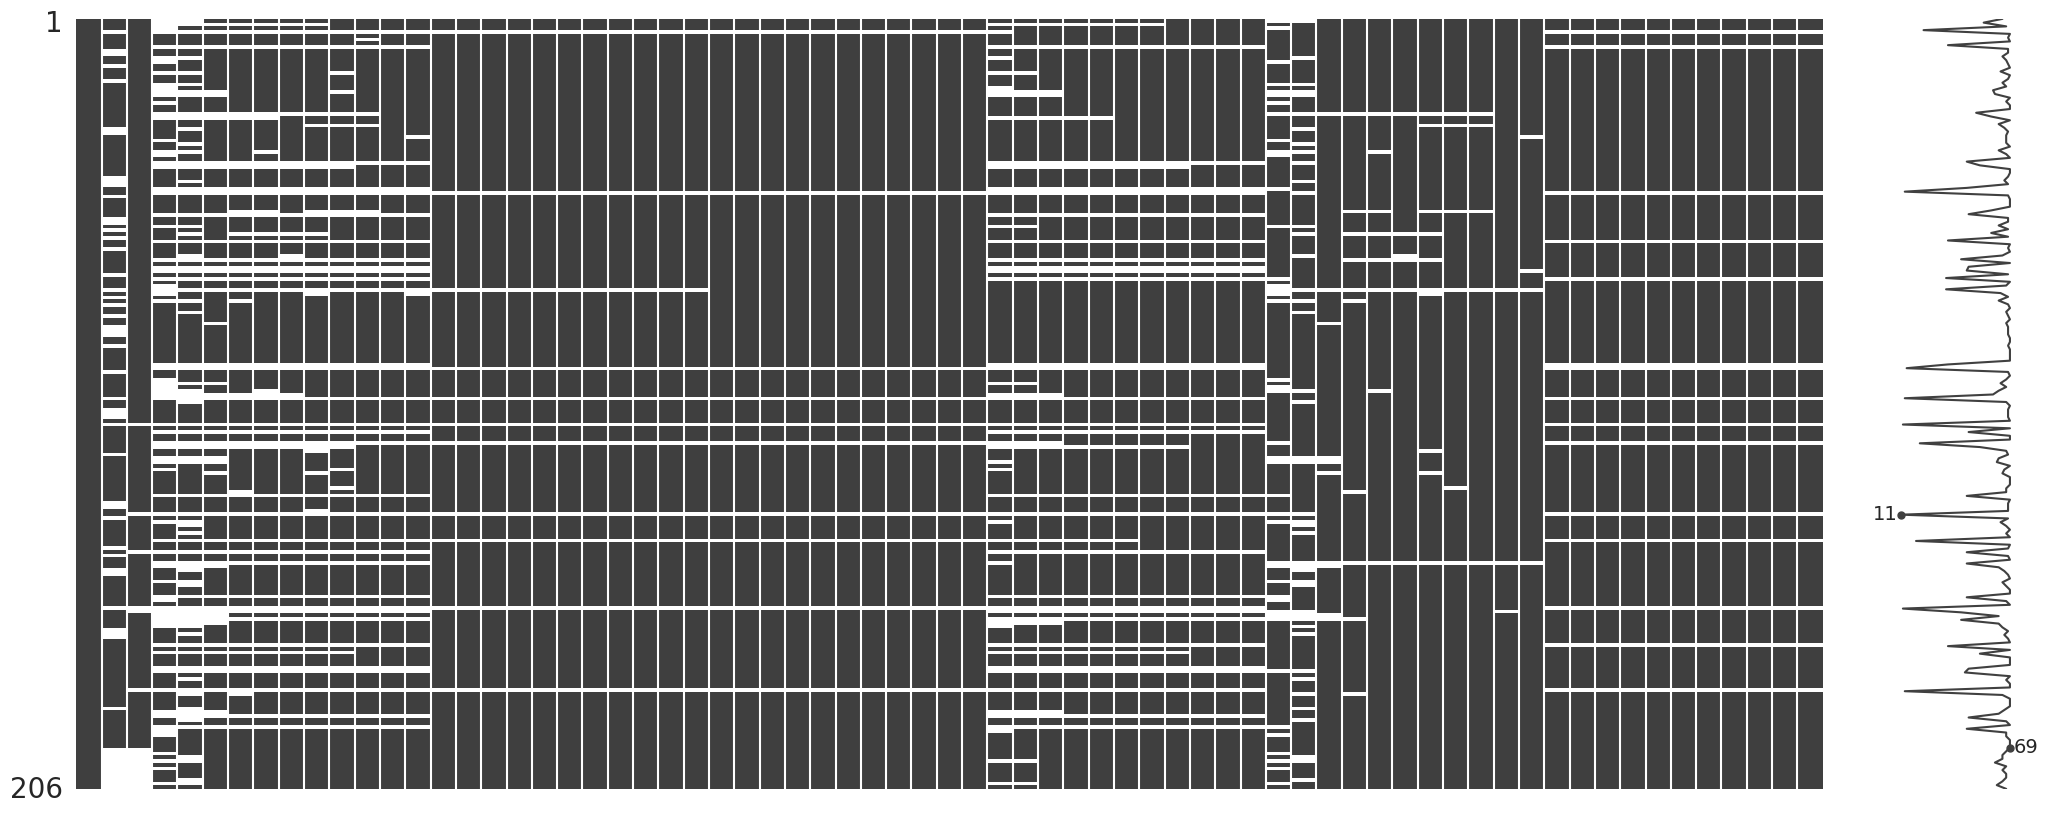

In [153]:
msn.matrix(df_selected);

*Sadece kadınlar için değerlerim olduğu için veri setinde yer alan "_f" kısımlarını kaldırıyoruz.*

In [155]:
df_selected.columns = df_selected.columns.str.replace('f_', '', regex=False)

*Eksik verilerimizi doldurmak için "ffill" yöntemini kullanarak her bir metrik grubunu yıllarına göre kendi içerisinde gruplayarak bir önceki değer ile dolduruyoruz.*

In [157]:
import pandas as pd

# Yıl gruplarını belirle
metrics_groups = {
    "gii": ['gii_1995', 'gii_2000', 'gii_2005', 'gii_2010', 'gii_2011', 'gii_2012', 'gii_2013', 'gii_2014', 'gii_2015', 'gii_2016', 'gii_2017'],
    "mmr": ['mmr_1995', 'mmr_2000', 'mmr_2005', 'mmr_2010', 'mmr_2011', 'mmr_2012', 'mmr_2013', 'mmr_2014', 'mmr_2015', 'mmr_2016', 'mmr_2017'],
    "abr": ['abr_1995', 'abr_2000', 'abr_2005', 'abr_2010', 'abr_2011', 'abr_2012', 'abr_2013', 'abr_2014', 'abr_2015', 'abr_2016', 'abr_2017'],
    "se": ['se_1995', 'se_2000', 'se_2005', 'se_2010', 'se_2011', 'se_2012', 'se_2013', 'se_2014', 'se_2015', 'se_2016', 'se_2017'],
    "pr": ['pr_1995', 'pr_2000', 'pr_2005', 'pr_2010', 'pr_2011', 'pr_2012', 'pr_2013', 'pr_2014', 'pr_2015', 'pr_2016', 'pr_2017'],
    "lfpr": ['lfpr_1995', 'lfpr_2000', 'lfpr_2005', 'lfpr_2010', 'lfpr_2011', 'lfpr_2012', 'lfpr_2013', 'lfpr_2014', 'lfpr_2015', 'lfpr_2016', 'lfpr_2017']
}

# Her metrik için eksik değerleri yıllar içinde doldur
for metric, columns in metrics_groups.items():
    df_selected[columns] = df_selected[columns].ffill(axis=1)

# Sonuçları kontrol et
print(df_selected.isnull().sum())


country       0
region       55
hdicode      17
gii_1995     78
gii_2000     62
             ..
lfpr_2013    15
lfpr_2014    15
lfpr_2015    15
lfpr_2016    15
lfpr_2017    15
Length: 69, dtype: int64


<ipython-input-157-163764819194>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-163764819194>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-163764819194>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-

In [158]:
df_selected.isnull().sum().sum()

1433

In [160]:
for metric, columns in metrics_groups.items():
    missing_rows = df_selected[columns][df_selected[columns].isnull().any(axis=1)]
    
    print(f"\n{metric.upper()} metrik grubu - Eksik Veri İçeren Satırlar:")
    display(missing_rows)  



GII metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,gii_1995,gii_2000,gii_2005,gii_2010,gii_2011,gii_2012,gii_2013,gii_2014,gii_2015,gii_2016,gii_2017
0,NaN,NaN,0.745,0.751,0.743,0.734,0.724,0.714,0.702,0.690,0.673
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537,0.534,0.531,0.539
2,NaN,0.334,0.306,0.242,0.249,0.230,0.221,0.217,0.207,0.205,0.187
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,0.807,0.796,0.799,0.800,0.803,0.805,0.809,0.819,0.814,0.813
196,NaN,0.421,0.391,0.370,0.366,0.363,0.356,0.352,0.349,0.346,0.344
198,NaN,NaN,0.647,0.629,0.621,0.619,0.610,0.611,0.604,0.600,0.596
200,NaN,0.379,0.352,0.343,0.343,0.341,0.336,0.334,0.330,0.327,0.325



MMR metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,mmr_1995,mmr_2000,mmr_2005,mmr_2010,mmr_2011,mmr_2012,mmr_2013,mmr_2014,mmr_2015,mmr_2016,mmr_2017
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



ABR metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,abr_1995,abr_2000,abr_2005,abr_2010,abr_2011,abr_2012,abr_2013,abr_2014,abr_2015,abr_2016,abr_2017
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



SE metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,se_1995,se_2000,se_2005,se_2010,se_2011,se_2012,se_2013,se_2014,se_2015,se_2016,se_2017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.156360,22.447652,22.989213,23.103976
3,NaN,25.507228,43.374020,60.753890,63.573090,66.392290,69.211490,72.030690,71.672430,71.483840,71.483840
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,90.004771,89.990178,93.840650,93.829700,93.827550,93.847770,93.850010,93.843670,93.901900,93.684600
14,NaN,NaN,5.006081,5.537405,5.644106,5.750807,5.857509,5.964210,5.964210,6.021845,6.021845
18,NaN,91.225740,89.841120,88.456500,88.180440,87.905242,87.630903,87.357419,87.357419,87.357419,88.018107
19,NaN,NaN,NaN,44.814350,44.891620,53.090020,61.288420,69.486820,71.704350,73.057900,73.525025
20,NaN,NaN,NaN,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970
26,NaN,NaN,NaN,NaN,NaN,5.836010,9.323894,12.811778,16.299662,19.787546,23.275430
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



PR metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,pr_1995,pr_2000,pr_2005,pr_2010,pr_2011,pr_2012,pr_2013,pr_2014,pr_2015,pr_2016,pr_2017
0,NaN,NaN,25.925926,27.635328,27.635328,27.635328,27.635328,27.635328,27.444795,27.444795,27.444795
2,NaN,5.161290,7.142857,16.428571,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143
11,NaN,14.406780,31.736527,36.054422,34.931507,34.931507,34.931507,34.931507,37.804878,37.804878,37.804878
17,NaN,NaN,7.500000,15.000000,18.750000,18.750000,18.750000,17.500000,15.000000,15.000000,15.000000
19,NaN,NaN,12.280702,15.789474,19.298246,19.298246,19.298246,19.298246,19.298246,19.298246,19.298246
20,NaN,NaN,29.761905,32.142857,32.142857,29.518072,29.518072,29.518072,29.166667,33.928571,33.132530
22,NaN,10.191083,14.649682,30.120482,30.120482,30.120482,30.120482,51.807229,51.807229,51.807229,51.807229
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.451613,9.090909
32,NaN,21.782842,20.268456,21.325745,21.323036,21.323036,23.401406,23.401406,23.622846,23.622846,24.247606
35,NaN,NaN,10.161290,7.730263,7.730263,8.333333,8.333333,9.735974,8.166667,8.166667,8.166667



LFPR metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,lfpr_1995,lfpr_2000,lfpr_2005,lfpr_2010,lfpr_2011,lfpr_2012,lfpr_2013,lfpr_2014,lfpr_2015,lfpr_2016,lfpr_2017
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df_cleaned = df_selected.dropna(thresh=df_selected.shape[1] - 22)


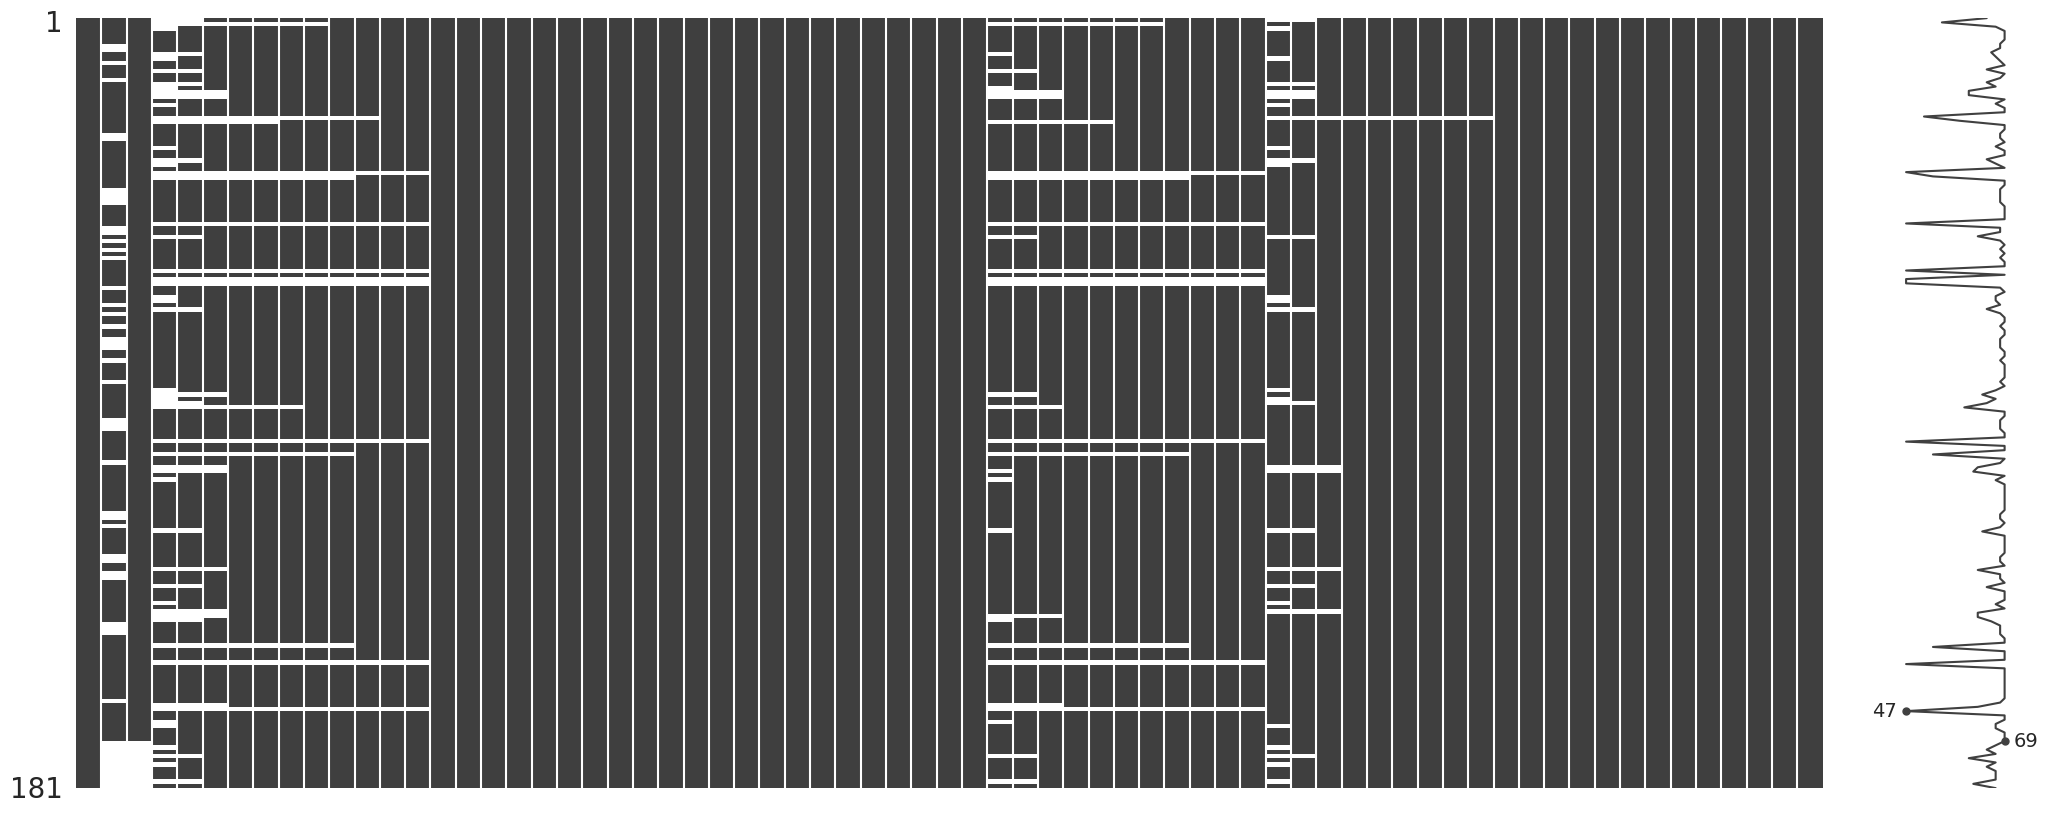

In [162]:
msn.matrix(df_cleaned);

In [163]:
for metric, columns in metrics_groups.items():
    missing_rows = df_cleaned[columns][df_cleaned[columns].isnull().any(axis=1)]
    
    print(f"\n{metric.upper()} metrik grubu - Eksik Veri İçeren Satırlar:")
    display(missing_rows) 



GII metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,gii_1995,gii_2000,gii_2005,gii_2010,gii_2011,gii_2012,gii_2013,gii_2014,gii_2015,gii_2016,gii_2017
0,NaN,NaN,0.745,0.751,0.743,0.734,0.724,0.714,0.702,0.690,0.673
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537,0.534,0.531,0.539
2,NaN,0.334,0.306,0.242,0.249,0.230,0.221,0.217,0.207,0.205,0.187
10,NaN,NaN,0.341,0.313,0.314,0.315,0.318,0.321,0.316,0.317,0.319
11,NaN,0.624,0.567,0.532,0.528,0.523,0.519,0.515,0.509,0.508,0.505
14,NaN,NaN,0.641,0.614,0.610,0.605,0.601,0.601,0.619,0.616,0.605
17,NaN,NaN,0.321,0.247,0.221,0.234,0.230,0.226,0.236,0.235,0.231
18,NaN,0.403,0.363,0.380,0.378,0.379,0.376,0.373,0.367,0.363,0.343
19,NaN,NaN,NaN,0.228,0.201,0.193,0.183,0.183,0.168,0.167,0.161
20,NaN,NaN,NaN,0.150,0.149,0.154,0.153,0.153,0.153,0.138,0.134



MMR metrik grubu - Eksik Veri İçeren Satırlar:


,mmr_1995,mmr_2000,mmr_2005,mmr_2010,mmr_2011,mmr_2012,mmr_2013,mmr_2014,mmr_2015,mmr_2016,mmr_2017



ABR metrik grubu - Eksik Veri İçeren Satırlar:


,abr_1995,abr_2000,abr_2005,abr_2010,abr_2011,abr_2012,abr_2013,abr_2014,abr_2015,abr_2016,abr_2017



SE metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,se_1995,se_2000,se_2005,se_2010,se_2011,se_2012,se_2013,se_2014,se_2015,se_2016,se_2017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.156360,22.447652,22.989213,23.103976
10,NaN,90.004771,89.990178,93.840650,93.829700,93.827550,93.847770,93.850010,93.843670,93.901900,93.684600
14,NaN,NaN,5.006081,5.537405,5.644106,5.750807,5.857509,5.964210,5.964210,6.021845,6.021845
18,NaN,91.225740,89.841120,88.456500,88.180440,87.905242,87.630903,87.357419,87.357419,87.357419,88.018107
19,NaN,NaN,NaN,44.814350,44.891620,53.090020,61.288420,69.486820,71.704350,73.057900,73.525025
20,NaN,NaN,NaN,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970,87.001970
26,NaN,NaN,NaN,NaN,NaN,5.836010,9.323894,12.811778,16.299662,19.787546,23.275430
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.175900,28.442976,28.727406
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



PR metrik grubu - Eksik Veri İçeren Satırlar:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,pr_1995,pr_2000,pr_2005,pr_2010,pr_2011,pr_2012,pr_2013,pr_2014,pr_2015,pr_2016,pr_2017
0,NaN,NaN,25.925926,27.635328,27.635328,27.635328,27.635328,27.635328,27.444795,27.444795,27.444795
2,NaN,5.161290,7.142857,16.428571,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143
11,NaN,14.406780,31.736527,36.054422,34.931507,34.931507,34.931507,34.931507,37.804878,37.804878,37.804878
17,NaN,NaN,7.500000,15.000000,18.750000,18.750000,18.750000,17.500000,15.000000,15.000000,15.000000
19,NaN,NaN,12.280702,15.789474,19.298246,19.298246,19.298246,19.298246,19.298246,19.298246,19.298246
20,NaN,NaN,29.761905,32.142857,32.142857,29.518072,29.518072,29.518072,29.166667,33.928571,33.132530
22,NaN,10.191083,14.649682,30.120482,30.120482,30.120482,30.120482,51.807229,51.807229,51.807229,51.807229
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.451613,9.090909
32,NaN,21.782842,20.268456,21.325745,21.323036,21.323036,23.401406,23.401406,23.622846,23.622846,24.247606
35,NaN,NaN,10.161290,7.730263,7.730263,8.333333,8.333333,9.735974,8.166667,8.166667,8.166667



LFPR metrik grubu - Eksik Veri İçeren Satırlar:


,lfpr_1995,lfpr_2000,lfpr_2005,lfpr_2010,lfpr_2011,lfpr_2012,lfpr_2013,lfpr_2014,lfpr_2015,lfpr_2016,lfpr_2017


In [164]:
df_cleaned = df_cleaned.drop(columns=[col for col in df_selected.columns if col.startswith("gii")])


*Eksik verileri bu aşamadan sonra büyük ölçüde azalttığımız için bizi yanıltmaması adına ortalama değerleri ile dolduruyoruz.*

In [165]:
metrics_groups = {
    "mmr": ['mmr_1995', 'mmr_2000', 'mmr_2005', 'mmr_2010', 'mmr_2011', 'mmr_2012', 'mmr_2013', 'mmr_2014', 'mmr_2015', 'mmr_2016', 'mmr_2017'],
    "abr": ['abr_1995', 'abr_2000', 'abr_2005', 'abr_2010', 'abr_2011', 'abr_2012', 'abr_2013', 'abr_2014', 'abr_2015', 'abr_2016', 'abr_2017'],
    "se": ['se_1995', 'se_2000', 'se_2005', 'se_2010', 'se_2011', 'se_2012', 'se_2013', 'se_2014', 'se_2015', 'se_2016', 'se_2017'],
    "pr": ['pr_1995', 'pr_2000', 'pr_2005', 'pr_2010', 'pr_2011', 'pr_2012', 'pr_2013', 'pr_2014', 'pr_2015', 'pr_2016', 'pr_2017'],
    "lfpr": ['lfpr_1995', 'lfpr_2000', 'lfpr_2005', 'lfpr_2010', 'lfpr_2011', 'lfpr_2012', 'lfpr_2013', 'lfpr_2014', 'lfpr_2015', 'lfpr_2016', 'lfpr_2017']
}

for metric, columns in metrics_groups.items():
    mean_values = df_cleaned[columns].mean()

    df_cleaned[columns] = df_cleaned[columns].apply(lambda col: col.fillna(mean_values[col.name]), axis=0)


<Axes: >

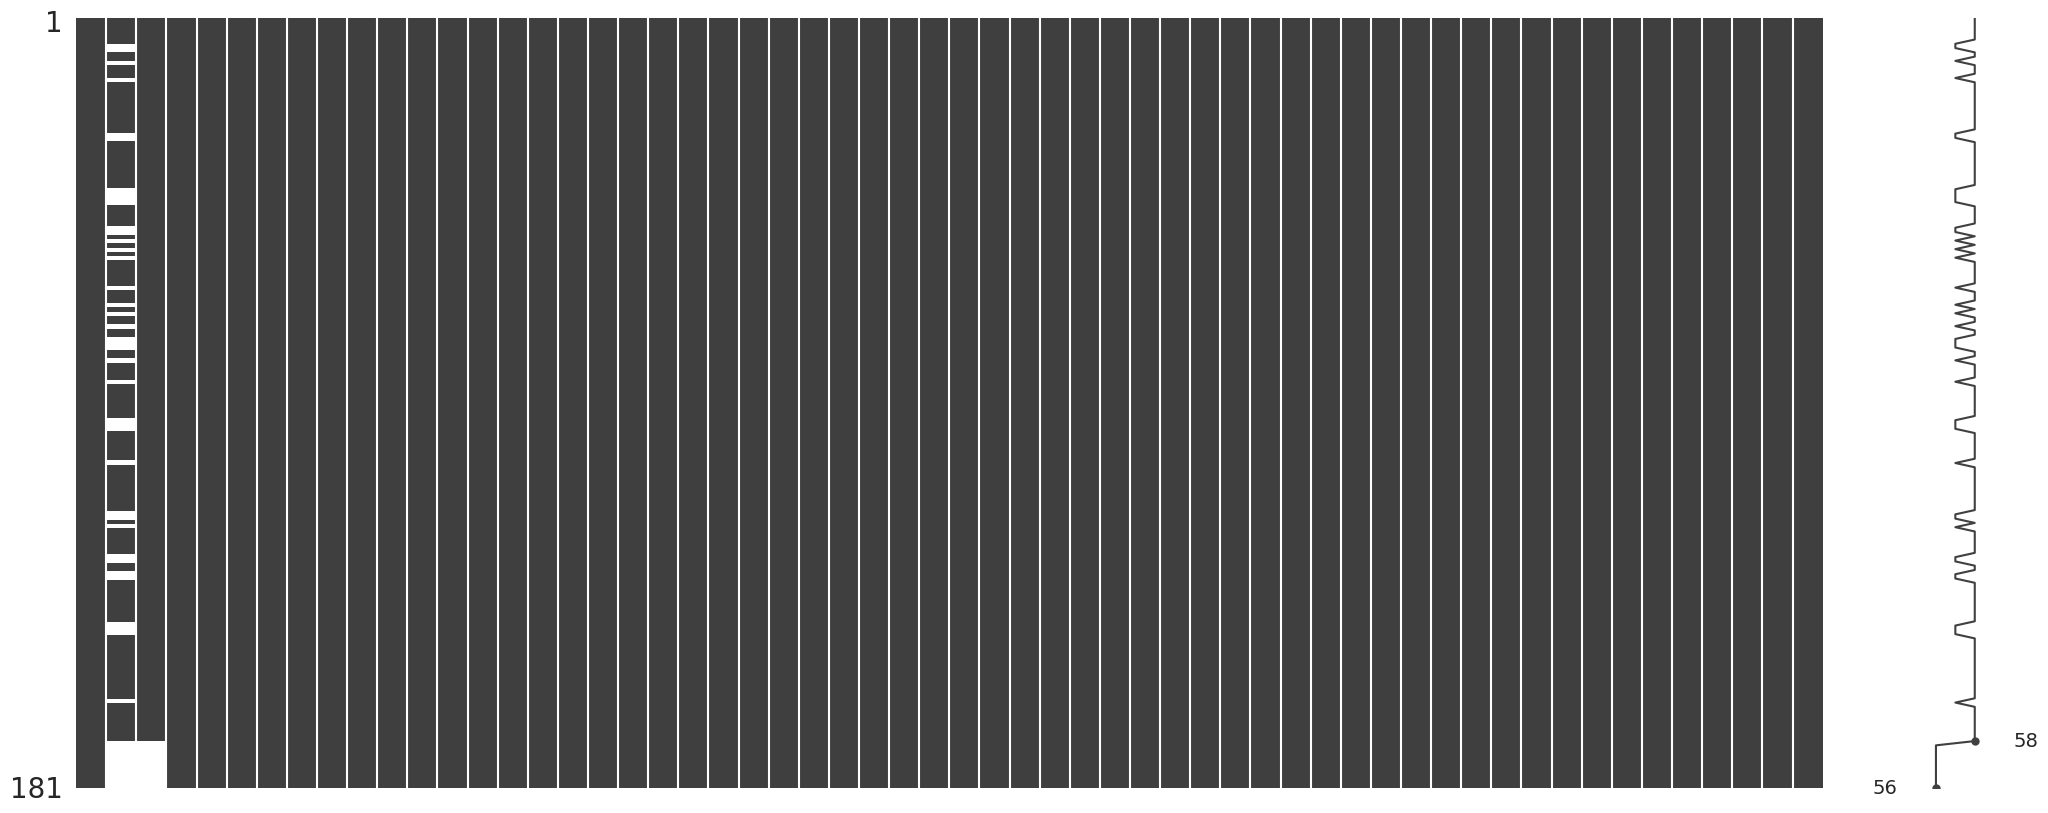

In [166]:
msn.matrix(df_cleaned)

# Temizlediğimiz veri seti ile analiz işlemleri.

1. Metriklerin yıllar bazında değişimlerinin incelenmesi

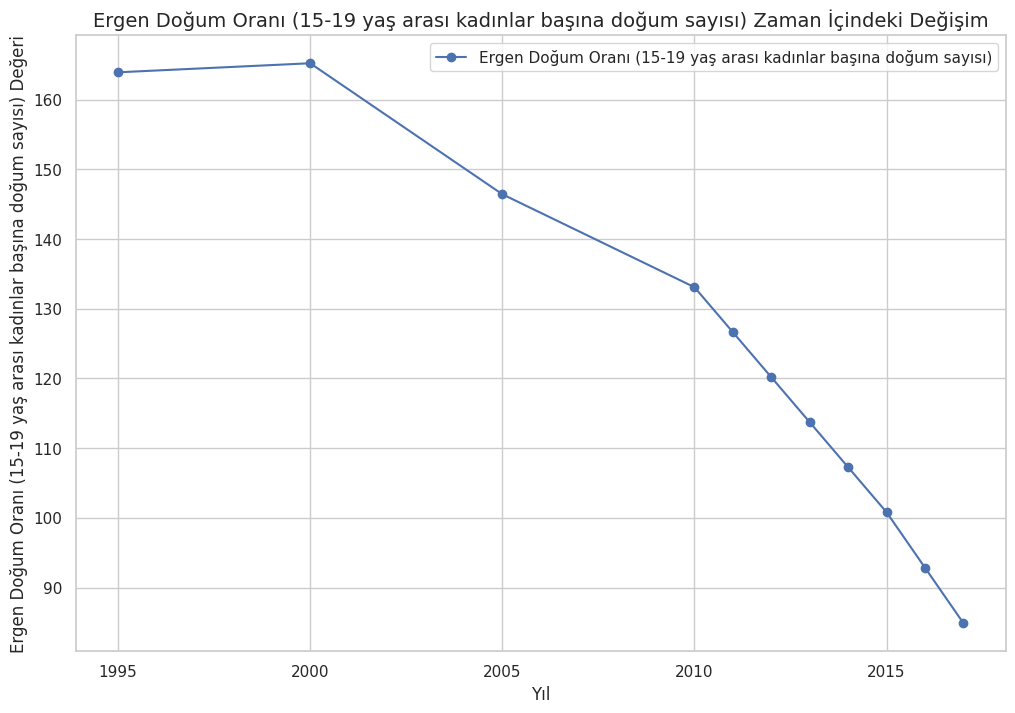

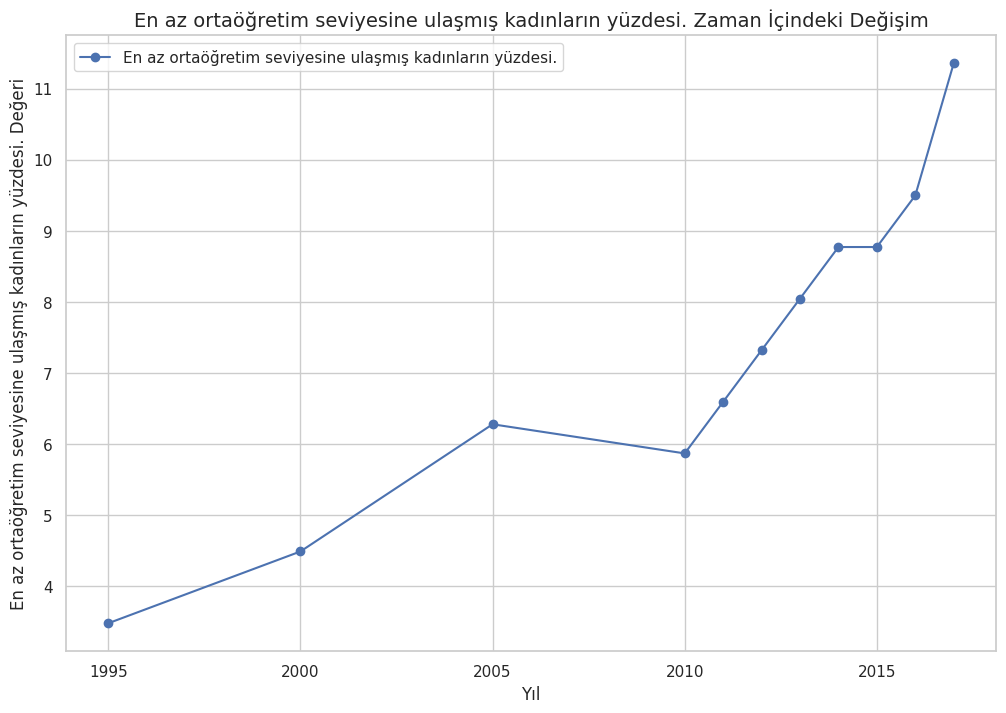

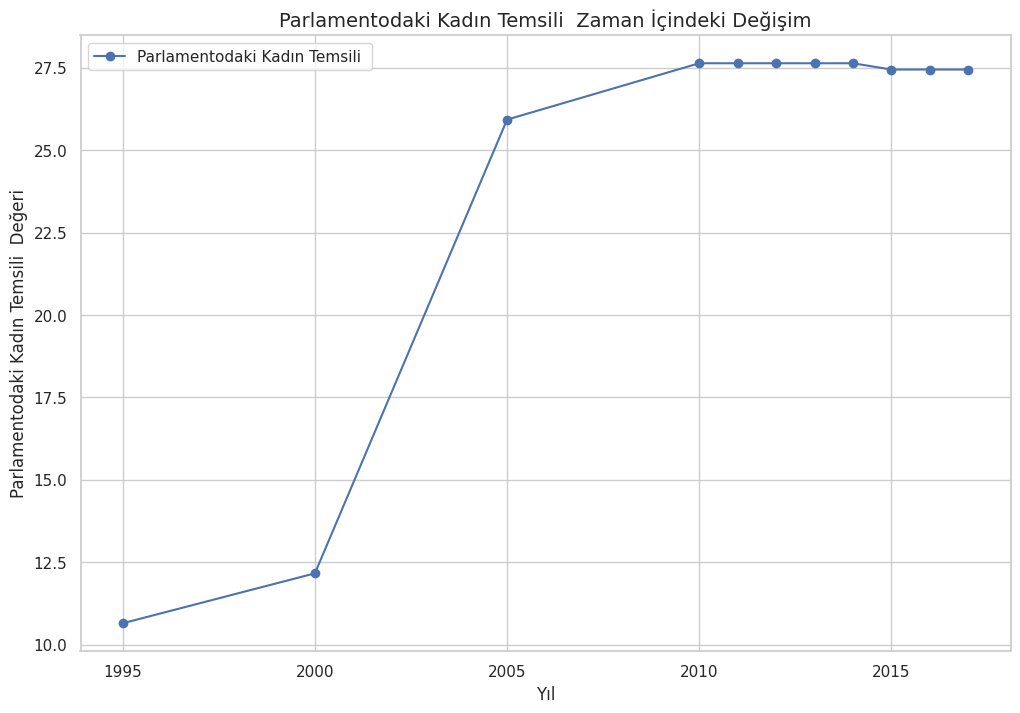

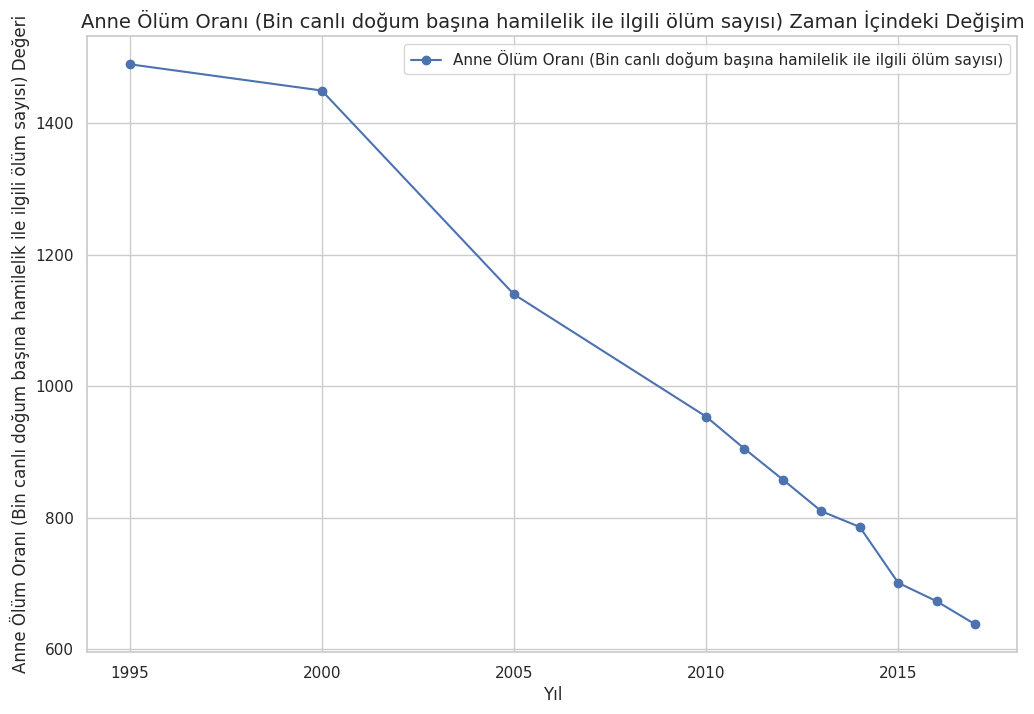

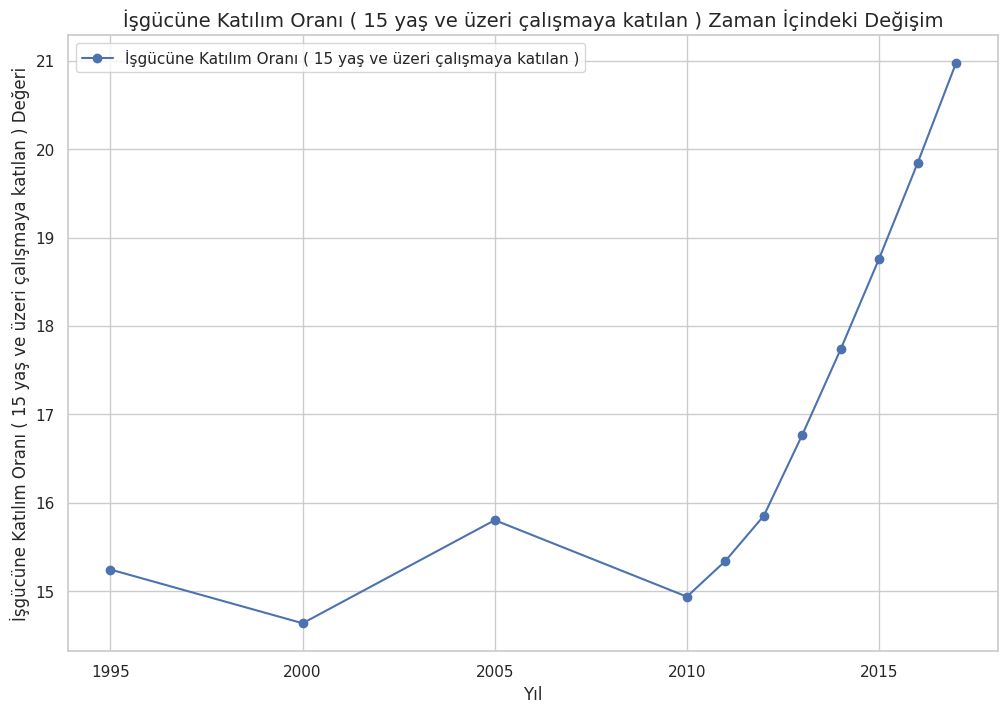

In [173]:
import matplotlib.pyplot as plt

columns = [
    'abr', 'se', 'pr', 'mmr', 'lfpr'
]

rename_dict = {
   
    'abr': 'Ergen Doğum Oranı (15-19 yaş arası kadınlar başına doğum sayısı)',
    'se': 'En az ortaöğretim seviyesine ulaşmış kadınların yüzdesi.',
    'pr': 'Parlamentodaki Kadın Temsili ',
    'mmr': 'Anne Ölüm Oranı (Bin canlı doğum başına hamilelik ile ilgili ölüm sayısı)',
    'lfpr': 'İşgücüne Katılım Oranı ( 15 yaş ve üzeri çalışmaya katılan )'


}

years = [1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

for feature_name in columns:
    feature_name_new = rename_dict.get(feature_name, feature_name)  
    
    
    data = [df_cleaned[f"{feature_name}_{year}"].values[0] for year in years]
    
  
    plt.figure(figsize=(12, 8))
    plt.plot(years, data, marker='o', label=feature_name_new)
    plt.title(f'{feature_name_new} Zaman İçindeki Değişim', fontsize=14)
    plt.xlabel('Yıl', fontsize=12)
    plt.ylabel(f'{feature_name_new} Değeri', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()


# Her bir metrik grubunun 2025 yılı için tahmin sonuçlarının ve doğruluk oranlarının hesaplanması.

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

years = [1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
metrics = ['mmr', 'abr', 'se', 'pr', 'lfpr']

predictions = {}

for metric in metrics:
    X = np.array(years).reshape(-1, 1) 
    y = df_cleaned[[f"{metric}_{year}" for year in years]].mean(axis=0).values  
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    prediction_2025 = model.predict(np.array([[2025]]))[0]
    predictions[metric] = {
        'prediction_2025': prediction_2025,
        'r2_score': r2,
        'mae': mae,
        'mse': mse,
        'rmse': rmse
    }

for metric, result in predictions.items():
    print(f"2025 yılı için {metric} tahmini: {result['prediction_2025']}")
    print(f"R² Skoru: {result['r2_score']:.3f}")
    print(f"Mean Absolute Error (MAE): {result['mae']:.3f}")
    print(f"Mean Squared Error (MSE): {result['mse']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {result['rmse']:.3f}")
    print("-" * 50)


2025 yılı için mmr tahmini: 90.07388672580419
R² Skoru: 0.988
Mean Absolute Error (MAE): 4.536
Mean Squared Error (MSE): 24.454
Root Mean Squared Error (RMSE): 4.945
--------------------------------------------------
2025 yılı için abr tahmini: 42.079672886440676
R² Skoru: 0.988
Mean Absolute Error (MAE): 0.576
Mean Squared Error (MSE): 0.622
Root Mean Squared Error (RMSE): 0.789
--------------------------------------------------
2025 yılı için se tahmini: 68.44111622427386
R² Skoru: 0.993
Mean Absolute Error (MAE): 0.471
Mean Squared Error (MSE): 0.271
Root Mean Squared Error (RMSE): 0.520
--------------------------------------------------
2025 yılı için pr tahmini: 26.713538780935323
R² Skoru: 0.993
Mean Absolute Error (MAE): 0.206
Mean Squared Error (MSE): 0.089
Root Mean Squared Error (RMSE): 0.298
--------------------------------------------------
2025 yılı için lfpr tahmini: 52.29310582564193
R² Skoru: 0.997
Mean Absolute Error (MAE): 0.033
Mean Squared Error (MSE): 0.001
Root Me

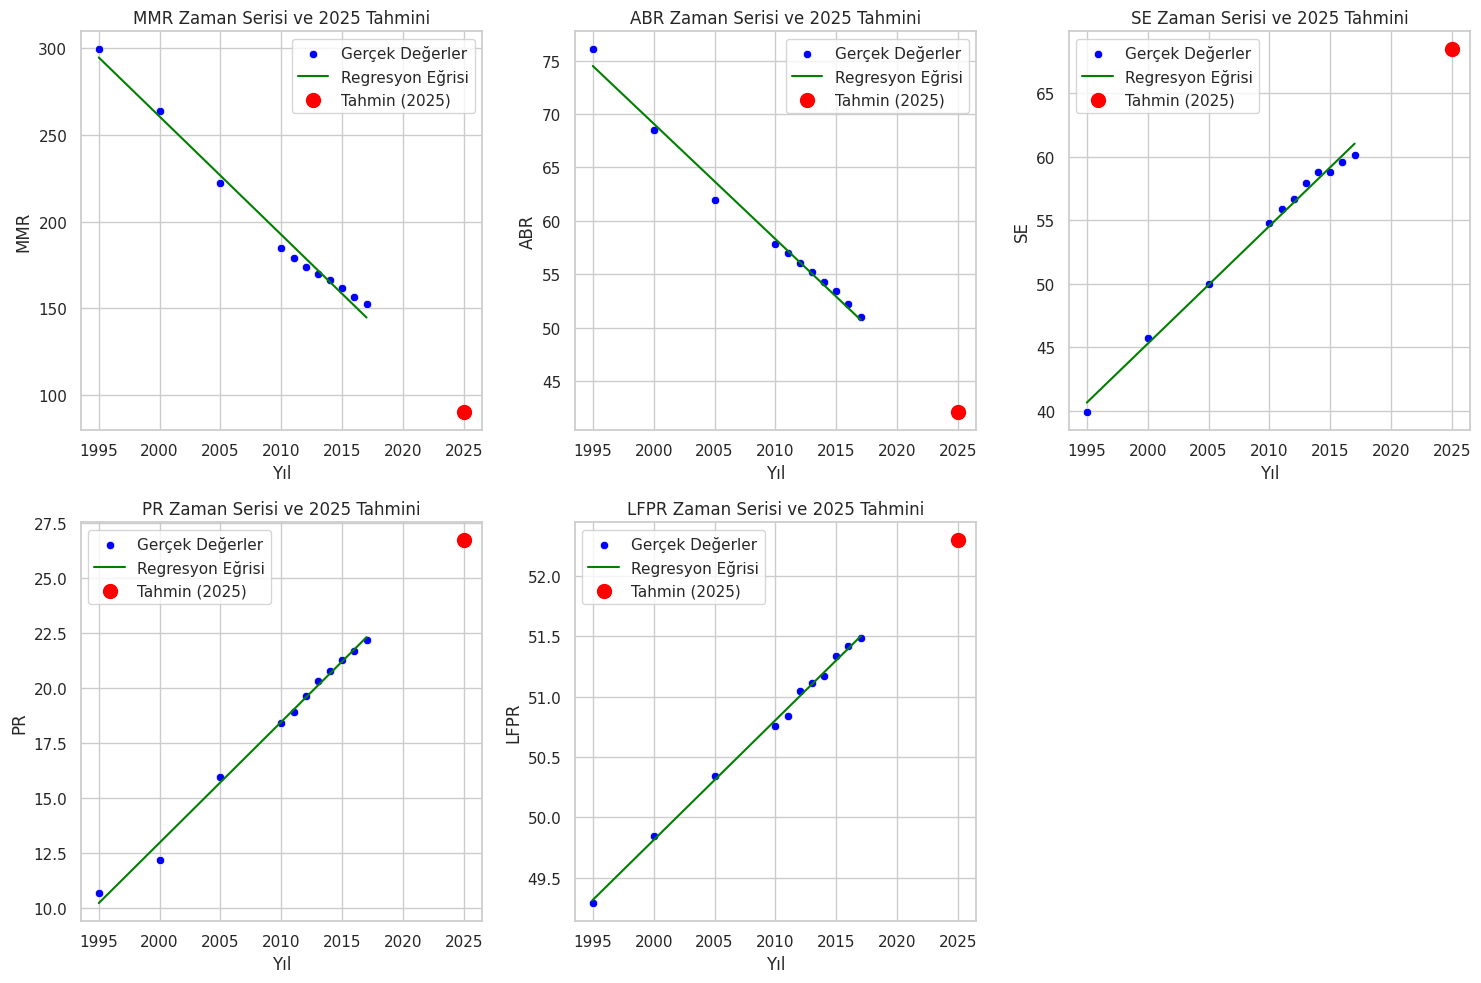

In [178]:

plt.figure(figsize=(15, 10))
import seaborn as sns


for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1) 
    
  
    X = np.array(years)
    y = df_cleaned[[f"{metric}_{year}" for year in years]].mean(axis=0).values
    
 
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    
 
    prediction_2025 = model.predict(np.array([[2025]]))[0]


    sns.scatterplot(x=X, y=y, label="Gerçek Değerler", color="blue")
    sns.lineplot(x=X, y=model.predict(X.reshape(-1, 1)), label="Regresyon Eğrisi", color="green")
    plt.scatter(2025, prediction_2025, color="red", marker="o", s=100, label="Tahmin (2025)")

    plt.title(f"{metric.upper()} Zaman Serisi ve 2025 Tahmini", fontsize=12)
    plt.xlabel("Yıl")
    plt.ylabel(metric.upper())
    plt.legend()

plt.tight_layout()
plt.show()


# Bölgelere göre analiz işlemleri

Bölgelerin nasıl isimlendirildiğini inceliyoruz.

In [180]:
df["region"].unique()

array(['SA', 'SSA', 'ECA', nan, 'AS', 'LAC', 'EAP'], dtype=object)

*Boş olan regionları doldurmak için hangi şehirlere karşılık gelen regionların boş olduğunu saptıyoruz.*

In [182]:
df[df["region"].isnull()]["country"]


3                              Andorra
8                            Australia
9                              Austria
12                             Belgium
16                            Bulgaria
29                              Canada
30                         Switzerland
42                              Cyprus
43                             Czechia
44                             Germany
47                             Denmark
53                               Spain
54                             Estonia
56                             Finland
58                              France
61                      United Kingdom
68                              Greece
72              Hong Kong, China (SAR)
74                             Croatia
76                             Hungary
79                             Ireland
82                             Iceland
83                              Israel
84                               Italy
87                               Japan
94                 Korea 

*Regionları doldurma işlemini yapıyoruz.*

In [183]:
# Ülkeler ve bölgelere ait eşleme

region_map = {
    "Andorra": "ECA",
    "Australia": "EAP",
    "Austria": "ECA",
    "Belgium": "ECA",
    "Bulgaria": "ECA",
    "Canada": "NA",
    "Switzerland": "ECA",
    "Cyprus": "ECA",
    "Czechia": "ECA",
    "Germany": "ECA",
    "Denmark": "ECA",
    "Spain": "ECA",
    "Estonia": "ECA",
    "Finland": "ECA",
    "France": "ECA",
    "United Kingdom": "ECA",
    "Greece": "ECA",
    "Hong Kong, China (SAR)": "EAP",
    "Croatia": "ECA",
    "Hungary": "ECA",
    "Ireland": "ECA",
    "Iceland": "ECA",
    "Israel": "ECA",
    "Italy": "ECA",
    "Japan": "EAP",
    "Korea (Republic of)": "EAP",
    "Liechtenstein": "ECA",
    "Lithuania": "ECA",
    "Luxembourg": "ECA",
    "Latvia": "ECA",
    "Monaco": "ECA",
    "Malta": "ECA",
    "Netherlands": "ECA",
    "Norway": "ECA",
    "New Zealand": "EAP",
    "Poland": "ECA",
    "Portugal": "ECA",
    "Romania": "ECA",
    "Russian Federation": "ECA",
    "San Marino": "ECA",
    "Slovakia": "ECA",
    "Slovenia": "ECA",
    "Sweden": "ECA",
    "United States": "NA",

    
   
}

df['region'] = df.apply(lambda row: region_map.get(row['country'], row['region']), axis=1)



Doldurulamamış regionlara baktığımızda şehir isimlendirmelerinin düzgün yapılmadığını görüyoruz.

In [186]:
df[df["region"].isnull()]["country"]


195        Very high human development
196             High human development
197           Medium human development
198              Low human development
199                        Arab States
200          East Asia and the Pacific
201            Europe and Central Asia
202    Latin America and the Caribbean
203                         South Asia
204                 Sub-Saharan Africa
205                              World
Name: country, dtype: object

In [187]:
df = df.drop(df.index[194:205])

*En son temizlediğimiz df_cleaned veri setimizin içerisine "region" sütunumuzu da ekliyoruz.*

In [188]:
df["region"] = df_cleaned["region"]


In [189]:
df_cleaned.head()

,country,region,hdicode,mmr_1995,mmr_2000,mmr_2005,mmr_2010,mmr_2011,mmr_2012,mmr_2013,...,lfpr_2000,lfpr_2005,lfpr_2010,lfpr_2011,lfpr_2012,lfpr_2013,lfpr_2014,lfpr_2015,lfpr_2016,lfpr_2017
0,Afghanistan,SA,Low,1490.0,1450.0,1140.0,954.0,905.0,858.0,810.0,...,14.634,15.801,14.935,15.339,15.850,16.765,17.735,18.760,19.840,20.973
1,Angola,SSA,Medium,1060.0,827.0,519.0,326.0,300.0,281.0,269.0,...,75.624,75.493,75.767,75.851,75.910,75.971,76.019,76.065,76.108,76.130
2,Albania,ECA,High,38.0,23.0,22.0,21.0,22.0,17.0,16.0,...,51.479,47.943,45.761,46.515,47.371,43.311,43.297,46.102,46.451,46.795
4,United Arab Emirates,AS,Very High,9.0,6.0,5.0,4.0,4.0,4.0,3.0,...,33.802,37.294,44.251,45.365,46.555,47.835,49.196,50.588,51.416,52.532
5,Argentina,LAC,Very High,72.0,66.0,59.0,51.0,48.0,47.0,44.0,...,49.826,49.611,47.952,48.228,48.324,47.942,47.318,48.016,48.699,49.370


*Ergen Doğum Oranınını bölgeler bazında grafikler yardımıyla analizini yapıyoruz.*

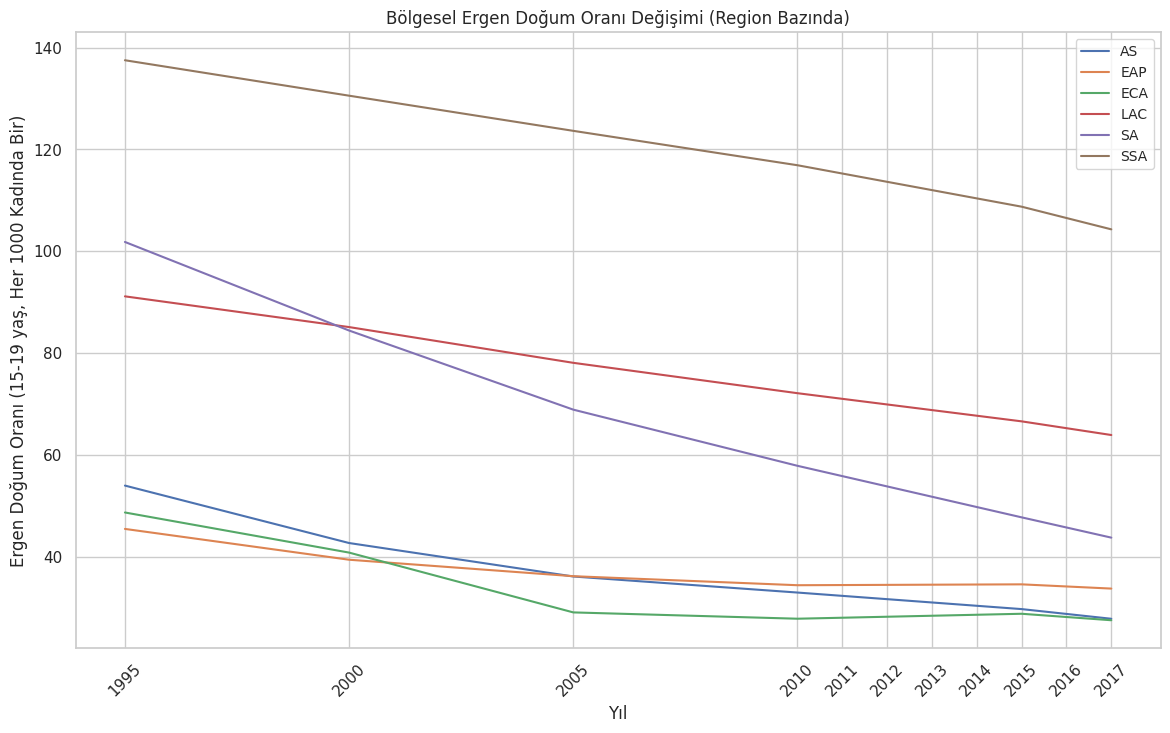

In [191]:

abr_cols = ['abr_1995', 'abr_2000', 'abr_2005', 'abr_2010', 'abr_2011', 'abr_2012', 'abr_2013', 'abr_2014', 'abr_2015', 'abr_2016', 'abr_2017']

regions = df_cleaned.groupby("region")["country"].apply(list).to_dict()

years = sorted([int(col.split('_')[1]) for col in abr_cols])

plt.figure(figsize=(14, 8))

for region, countries in regions.items():
    region_data = df_cleaned[df_cleaned["country"].isin(countries)][["region"] + abr_cols].set_index("region")
    
    region_avg = region_data[abr_cols].mean(axis=0)
    
    plt.plot(years, region_avg.values, label=f"{region}")

plt.xlabel("Yıl")
plt.ylabel("Ergen Doğum Oranı (15-19 yaş, Her 1000 Kadında Bir)")
plt.title("Bölgesel Ergen Doğum Oranı Değişimi (Region Bazında)")
plt.legend(loc="upper right", fontsize="small")
plt.xticks(years, rotation=45)
plt.grid(True)
plt.show()


*Türkiye'de Ergen Doğum Oranının analizini yapıyoruz*

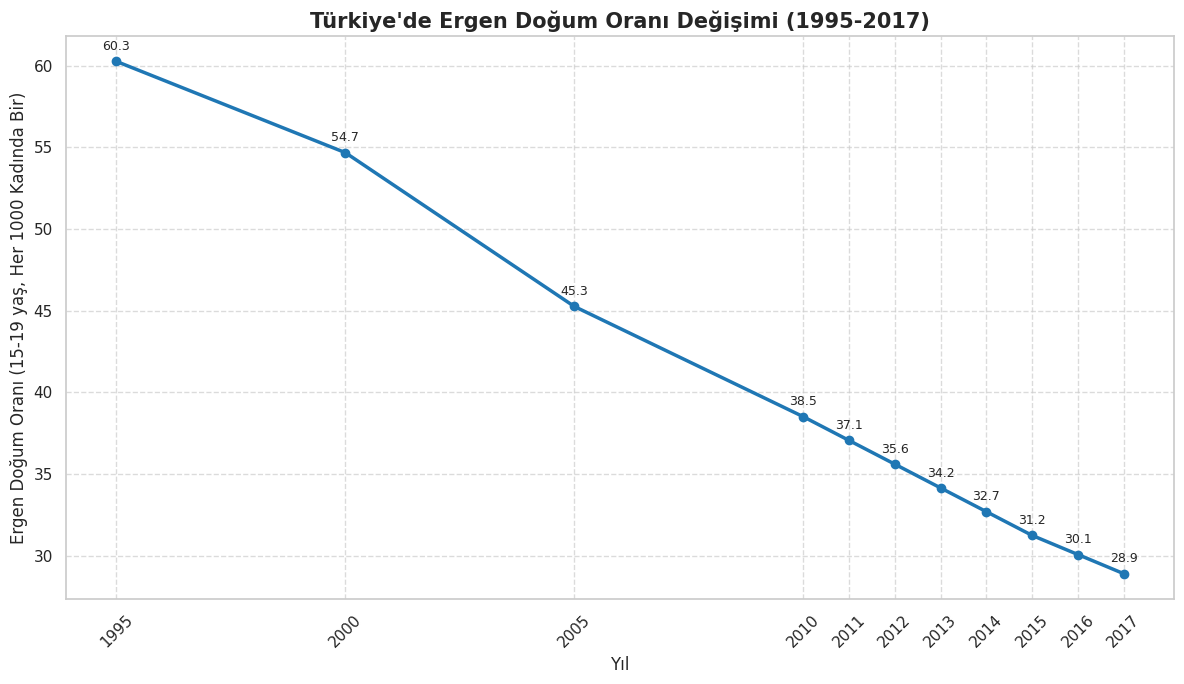

In [192]:
sns.set(style="whitegrid")

turkey_data = df_cleaned[df_cleaned["country"] == "Turkey"]
turkey_abr = turkey_data[abr_cols].iloc[0].values

# Grafik
plt.figure(figsize=(12, 7))
plt.plot(years, turkey_abr, marker='o', linestyle='-', linewidth=2.5, color='#1f77b4')

plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ergen Doğum Oranı (15-19 yaş, Her 1000 Kadında Bir)", fontsize=12)
plt.title("Türkiye'de Ergen Doğum Oranı Değişimi (1995-2017)", fontsize=15, fontweight='bold')
plt.xticks(years, rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Veri noktalarına etiket
for x, y in zip(years, turkey_abr):
    plt.text(x, y + 0.5, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

*Bölgelere göre Türkiye'deki Ergen Doğum Oranının Kıyaslamasını Yapıyoruz.*

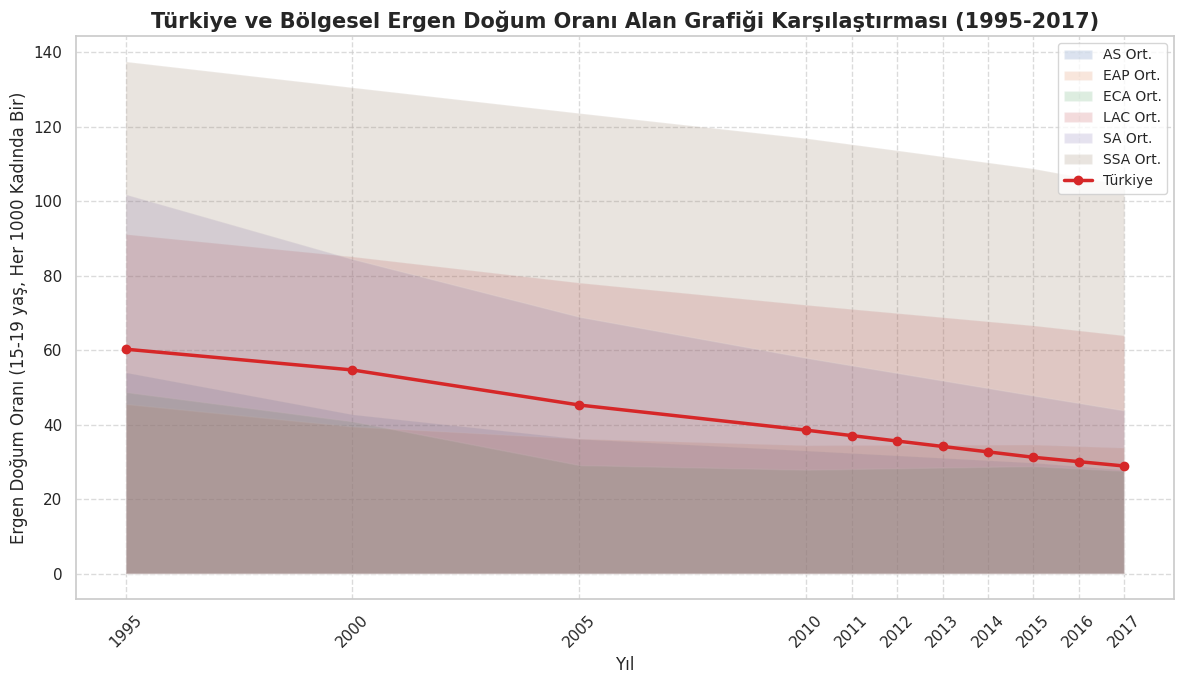

In [194]:

turkey_data = df_cleaned[df_cleaned["country"] == "Turkey"]

turkey_abr = turkey_data[abr_cols].iloc[0].values

plt.figure(figsize=(12, 7))

for region, countries in regions.items():
    region_data = df_cleaned[df_cleaned["country"].isin(countries)][abr_cols]
    region_avg = region_data.mean(axis=0)
    plt.fill_between(years, region_avg.values, alpha=0.2, label=f"{region} Ort.")

plt.plot(years, turkey_abr, marker='o', linestyle='-', linewidth=2.5, color='#d62728', label="Türkiye")


plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Ergen Doğum Oranı (15-19 yaş, Her 1000 Kadında Bir)", fontsize=12)
plt.title("Türkiye ve Bölgesel Ergen Doğum Oranı Alan Grafiği Karşılaştırması (1995-2017)", fontsize=15, fontweight='bold')
plt.xticks(years, rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(loc="upper right", fontsize="small")
plt.tight_layout()
plt.show()

# Parlamentodaki Kadın Temsili Sayısı ile Ergen Doğum Oranı Arasındaki İlişki


* Sadece 2019 yılına ait veriler üzerinden bir karşılaştırma yapıyoruz. Bu karşılaştırma için korelasyonu hesaplayarak aralarında mantıklı bir ilişki var mı durumuna bakıyoruz.
* H0 hipotezimiz: Parlamentodaki Kadın Sayısı ile ergen doğum oranı arasında hiçbir ilişki yoktur. 

Korelasyon Katsayısı: -0.639
Hassas P-değeri: 9.5518575675097220470031338323500968370390313130015e-20
Logaritmik Gösterim: 9.55e-20


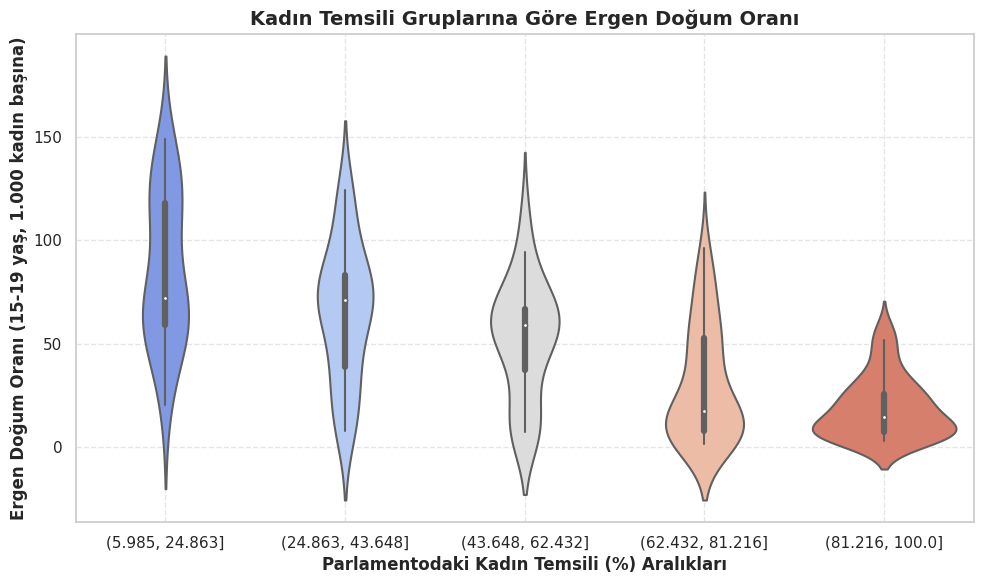

In [195]:
from scipy.stats import spearmanr, rankdata
from mpmath import mp

mp.dps = 50  

parliament_col = "se_f_2019"
abr_col = "abr_2019"

# df_cleaned veri setini kullanmama nedenimiz o veri setinde 2019 verilerinin yer almıyor olmasıdır.
df_analiz = df[["country", parliament_col, abr_col]].dropna()
df_no_outliers = df_analiz[df_analiz[abr_col] < 150]


rank_x = rankdata(df_no_outliers[parliament_col])
rank_y = rankdata(df_no_outliers[abr_col])
correlation, p_value = spearmanr(rank_x, rank_y)

print(f"Korelasyon Katsayısı: {correlation:.3f}")
print(f"Hassas P-değeri: {mp.mpf(p_value)}")
print(f"Logaritmik Gösterim: {p_value:.2e}")

df_no_outliers = df_no_outliers.copy()
df_no_outliers.loc[:, 'parliament_bins'] = pd.cut(df_no_outliers[parliament_col], bins=5)


plt.figure(figsize=(10, 6))
sns.violinplot(x='parliament_bins', y=abr_col, data=df_no_outliers, palette="coolwarm")

plt.xlabel("Parlamentodaki Kadın Temsili (%) Aralıkları", fontsize=12, weight='bold')
plt.ylabel("Ergen Doğum Oranı (15-19 yaş, 1.000 kadın başına)", fontsize=12, weight='bold')
plt.title("Kadın Temsili Gruplarına Göre Ergen Doğum Oranı", fontsize=14, weight='bold')

plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

* Korelasyon Kat sayısına baktığımızda, "-0.639" değeri bize bu iki durum için aralarında ters bir ilişki olduğunu söylemektedir.
* P değeri 0,05 değerinin altında kaldığında Ho hipotezimizi reddediyoruz ve çıkan sonucumuzda "9.5518575675097220470031338323500968370390313130015e-20" gibi çok küçük bir değer olduğunu görüyoruz. Bu durumda Ho hipotezini reddederek aralarında mantıklı bir ilişkinin var olduğunu söyleyebiliriz.


# Dünya Haritası Üzerinde Parlamentodaki Kadın Temsili ile Ergen Doğum Oranları Karşılaştırması 2019 Yılı İçin

In [197]:
import plotly.express as px

parliament_col = "se_f_2019" # Parlamentodaki kadın temsili (verideki son yıl)
abr_col = "abr_2019"  # Ergen doğum oranı (verideki son yıl)
country_col = "country"

# Eksik veri
df_filtered = df[[country_col, parliament_col, abr_col]].dropna()

# Dünya Haritası - Parlamentodaki Kadın Temsili
fig1 = px.choropleth( df_filtered,
    locations="country",
    locationmode="country names",
    color=parliament_col,
    hover_name="country",
    color_continuous_scale="Blues",
    title="Parlamentodaki Kadın Temsili (%) - Dünya Geneli",
    labels={parliament_col: "Parlamentodaki Kadın Temsili (%)"} )

fig1.show()

# Dünya Haritası - Ergen Doğum Oranı (ABR)**
fig2 = px.choropleth(df_filtered, 
                     locations="country", 
                     locationmode="country names", 
                     color=abr_col, 
                     hover_name="country", 
                     color_continuous_scale="Reds",
                     title="Ergen Doğum Oranı (ABR) - Dünya Geneli",
                     labels={abr_col: "Ergen Doğum Oranı Temsili (ABR) (%)"})

fig2.show()

# Parlamentodaki Kadın Temsili & Ergen Doğum Oranı Arasındaki Genel Eğilim Sonuçları
* Kadın temsili yüksek ülkelerde (Avrupa, Kuzey Amerika) genellikle Ergen Doğum Oranı daha düşük.
* Kadın temsili düşük olan ülkelerde (Afrika, Orta Doğu) Ergen Doğum Oranı daha yüksek.
  
**Bölgesel Karşılaştırma:**
* Avrupa (Kadın Temsili Yüksek, Ergen Doğum Oranı Düşük) Avrupa ülkelerinde parlamentodaki kadın temsili genellikle %30-%50 arasında. Ergen Doğum Oranı çok düşük (genellikle 10'un altında).

* Orta Doğu (Kadın Temsili Orta/Düşük, ABR Orta/Yüksek) Birkaç istisna hariç parlamentodaki kadın temsili genellikle %10-20 civarında. Ergen Doğum Oranı bölgeye göre değişiyor ama bazı ülkelerde Avrupa’ya göre daha yüksek.